<a href="https://colab.research.google.com/github/Athang9/GIS/blob/main/ps0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Area of Intrest**:
##Analyzing effects of Crime Rate, Literacy Rate, Income Rate on Public Safety

# **Goal**
I am planning to focusing on my research around Public Safety. I feel this aspect is much important and needs to be consider while traveling or living in a particular locality. I’m interested and curious to know how employement, income tax, active business locations, literacy, drug uses etc has affect on Public Safety (mostly security).

#**Dataset Links**

These data are in pdf format. I have converted PDF into Excel file using Python code.


###1. New Jersey Shapefile: https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

###2. New Jersey Crime Rate: https://nj.gov/njsp/ucr/uniform-crime-reports.shtml

###3. New Jersey Income Tax Collection: https://www.state.nj.us/treasury/taxation/soiintro.shtml


#**Below code belongs to the Problem Statement 0**

##Importing modules

In [2]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

##Importing map module for plotting map

In [3]:
!pip install mapclassify
import mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 932.3 kB/s eta 0:00:00


How to find dataset effectively: say you are interested in NJ counties, so just google that geography + "shapefile", i.e., "NJ counties shapefile"

##Importing shapefile from github and assigning to a variable

In [4]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O bounds_nj_shp.zip https://github.com/Athang9/GIS/raw/main/bounds_nj_shp.zip

zip_ref = zipfile.ZipFile('bounds_nj_shp.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njc=gpd.read_file('bounds_nj_shp.zip') #load the shapefile with gpd as njC

##Printing first 2 data from dataset

In [5]:
njc.head(2)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,275372,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.010 311529.770, 443068.440 31..."
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,829592,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78..."


##Plotting map using a shapefile

<Axes: >

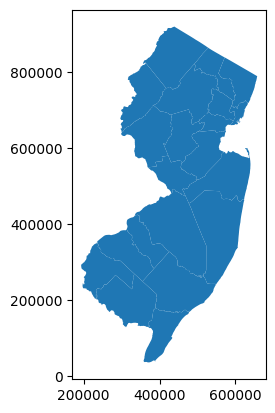

In [6]:
#make the map
njc.plot()  #plot function will help to plot the map of new jersey

#Plotting Population Density of New Jersey

<Axes: >

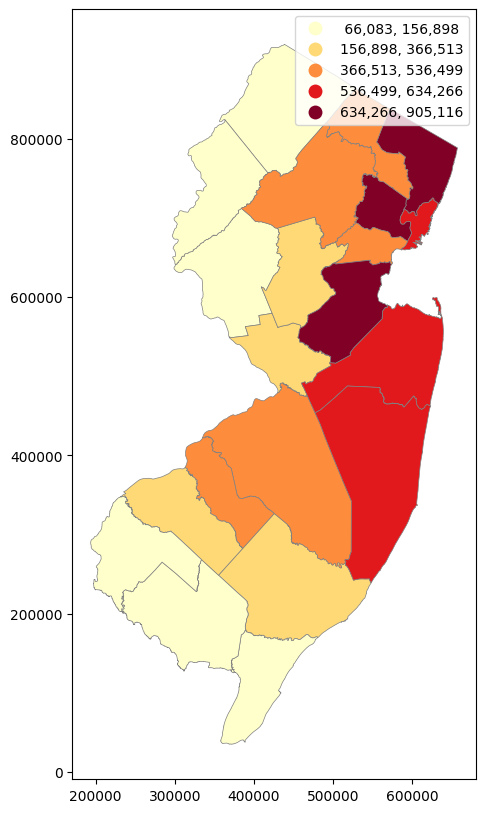

In [12]:
njc.plot(figsize=(8,10),column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}"})

#Checking variables inside dataset

In [13]:
njc.dtypes

COUNTY          object
COUNTY_LAB      object
CO              object
GNIS_NAME       object
GNIS            object
FIPSSTCO        object
FIPSCO          object
ACRES          float64
SQ_MILES       float64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
REGION          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

##Checking directories

In [14]:
!ls

bounds_nj_shp.zip     nj_counties.shp.xml  nj_munis.shp       nj_state.sbx
nj_counties.cpg       nj_counties.shx	   nj_munis.shp.xml   nj_state.shp
nj_counties.dbf       nj_munis.cpg	   nj_munis.shx       nj_state.shp.xml
nj_counties_fgdc.xml  nj_munis.dbf	   nj_state.cpg       nj_state.shx
nj_counties.prj       nj_munis_fgdc.xml    nj_state.dbf       sample_data
nj_counties.sbn       nj_munis.prj	   nj_state_fgdc.xml
nj_counties.sbx       nj_munis.sbn	   nj_state.prj
nj_counties.shp       nj_munis.sbx	   nj_state.sbn


##Checking data distribution

In [15]:
njc.describe()

,ACRES,SQ_MILES,POP2010,POP2000,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,Shape_Leng,Shape_Area
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01
mean,236668.445624,369.794446,418661.619048,400683.333333,375651.619048,356042.238095,2089.095238,2020.476190,1883.142857,1866.952381,559159.328973,1.030924e+10
std,129423.458908,202.224155,252391.802799,245685.165612,232024.704159,241526.155270,2857.463699,2774.989597,2548.549632,2651.426455,133171.141166,5.637663e+09
min,32982.400794,51.535001,66083.000000,64285.000000,65294.000000,64676.000000,190.000000,185.000000,188.000000,186.000000,321814.398490,1.436708e+09
25%,146431.864374,228.799788,156898.000000,146438.000000,138991.000000,132866.000000,340.000000,358.000000,332.000000,288.000000,492851.319687,6.378546e+09
50%,215166.893094,336.198271,448734.000000,423394.000000,395066.000000,356502.000000,1023.000000,976.000000,788.000000,666.000000,541587.507240,9.372632e+09
75%,310834.264884,485.678539,576567.000000,522541.000000,532498.000000,504094.000000,2527.000000,2367.000000,2284.000000,2073.000000,664545.338596,1.353989e+10
max,525002.683590,820.316693,905116.000000,884118.000000,829592.000000,850451.000000,12309.000000,11817.000000,10733.000000,10808.000000,788906.717476,2.286903e+10


# **Below code belongs to Problem Statement 1**

In [16]:
!pip install mapclassify
import mapclassify

mapping from gis datafile - if youre lucky, you'll get data from
shapefile for creating own shapefile you can use quamtum shapefile which can use to draw any shape and to get satellite image you can use google  maps export data as xml file and load it into python we will now plot data which is inside the shapefile

In [17]:
njc.dtypes #it will show variables with format

COUNTY          object
COUNTY_LAB      object
CO              object
GNIS_NAME       object
GNIS            object
FIPSSTCO        object
FIPSCO          object
ACRES          float64
SQ_MILES       float64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
REGION          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [18]:
#variables are in objec then you cannot classify that
#njc.head(2)

<Axes: >

[]

[]

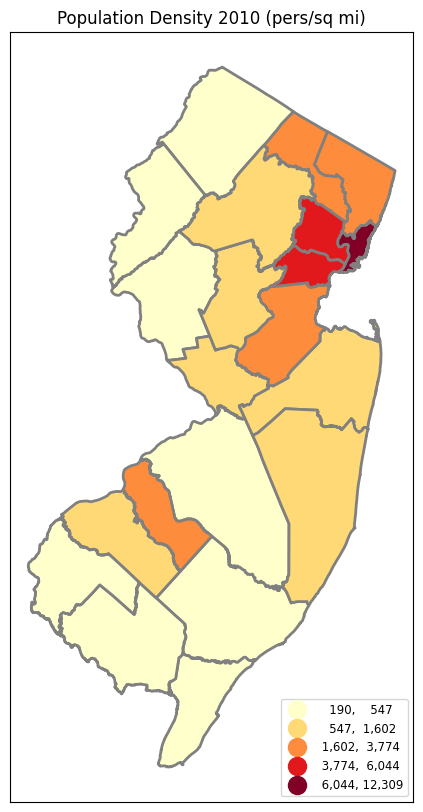

In [19]:
fig, ax = plt.subplots(1, figsize=(6,10))
njc.plot(ax=ax,column='POPDEN2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Population Density 2010 (pers/sq mi)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

Join & Merge

In [20]:
new_df=pd.read_excel('https://github.com/Athang9/GIS/raw/main/TotIncTaxCounty%20(1)%20(1).xlsx')

In [21]:
new_df.head()

,COUNTY,CODE,TOTAL_STATE_FEE,TOTAL_MUNI_TAX,TOTAL_STATE/MUNI
0,ATLANTIC,1,740146.25,209485.40,949631.65
1,BERGEN,2,1417081.07,849275.20,2266356.27
2,BURLINGTON,3,597149.02,355146.72,952295.74
3,CAMDEN,4,297085.46,164325.99,461411.45
4,CAPE MAY,5,2618516.90,679300.15,3297817.05


In [22]:
new_df.dtypes
new_df.head()

COUNTY               object
CODE                  int64
TOTAL_STATE_FEE     float64
TOTAL_MUNI_TAX      float64
TOTAL_STATE/MUNI    float64
dtype: object

,COUNTY,CODE,TOTAL_STATE_FEE,TOTAL_MUNI_TAX,TOTAL_STATE/MUNI
0,ATLANTIC,1,740146.25,209485.40,949631.65
1,BERGEN,2,1417081.07,849275.20,2266356.27
2,BURLINGTON,3,597149.02,355146.72,952295.74
3,CAMDEN,4,297085.46,164325.99,461411.45
4,CAPE MAY,5,2618516.90,679300.15,3297817.05


In [23]:
njc01=njc[['COUNTY ']]
njc01.rename(columns={'COUNTY': 'COUNTY'}, inplace=True)
njc01.head(2)

KeyError: ignored

In [ ]:
njc.head(2)
new_df.head(2)

In [ ]:
#njc1 = pd.merge(njc, new_df, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
#njc1[['COUNTY','POPDEN2010','TOTAL_STATE/MUNI','_merge']] #all good, NEW JERSEY expected not to merge

#njc2 = pd.merge(njc,new_df, on='COUNTY',how='inner',indicator=False) #so do 'inner' that will only keep the exact matches


In [ ]:
neew_df=pd.read_excel('https://github.com/Athang9/GIS/raw/main/TotalCrimeCounty.xlsx')
neew_df.head()

In [ ]:
#njc1 = pd.merge(njc, new_df, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
#njc3[['COUNTY','TOTAL_CRIME','_merge']] #all good, NEW JERSEY expected not to merge

#njc4 = pd.merge(njc,neew_df, on='COUNTY',how='inner',indicator=False) #so do 'inner' that will only keep the exact matches

In [ ]:
#njc1 = pd.merge(njc, new_df, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
#njc3[['COUNTY','TOTAL_CRIME','_merge']] #all good, NEW JERSEY expected not to merge

#njc4 = pd.merge(njc,neew_df, on='COUNTY',how='inner',indicator=False) #so do 'inner' that will only keep the exact matches

In [ ]:
#fig, ax = plt.subplots(1, figsize=(6,10))
#njc2.plot(ax=ax,column='',legend=True,cmap='RdYlGn_r',
#          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
#          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
##leg1 = ax.get_legend()
##leg1.set_title('''Population Density
##2010 (pers/sq mi)''')
#ax.title.set_text("Zillow Home Value Index")
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
##plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
##files.download('fig.pdf') #note can also right click fig and save image as

In [ ]:
neew_df
replacement_mapping = {'Atlantic County': 'ATLANTIC', 'Bergen County': 'BERGEN','Burlington County':'BURLINGTON','Camden County':'CAMDEN','	Cape May County':'CAPE MAY','Cumberland County':'CUMBERLAND','Essex County':'ESSEX','Gloucester County':'GLOUCESTER','Hudson County':'HUDSON','Hunterdon County':'HUNTERDON','Mercer County':'MERCER','Middlesex County':'MIDDLESEX','Monmouth County':'MONMOUTH','Morris County':'MORRIS','Ocean County':'OCEAN','Passaic County':'PASSAIC','Salem County':'SALEM','Somerset County':'SOMERSET','Sussex County':'SUSSEX','Union County':'UNION','Warren County':'WARREN'}
neew_df['COUNTY'] = neew_df['COUNTY'].replace(replacement_mapping)
#print(df)